In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

In [ ]:
# load scores

df_all_beta_scores = pd.read_csv('data_log\df_scores_beta.csv')
df_all_beta_scores.head()

,set_up,n_train,d,corr,alpha,noise,bias,method,angular_error,mse_error
0,LOG_n65000_d5_corr00_alpha025_noise00_bias00_rep0,1000.0,5.0,0.0,0.25,0.0,0.0,CC,0.224995,0.052207
1,LOG_n65000_d5_corr00_alpha025_noise00_bias00_rep0,1000.0,5.0,0.0,0.25,0.0,0.0,LOG.0,0.194198,0.039892
2,LOG_n65000_d5_corr00_alpha025_noise00_bias00_rep0,1000.0,5.0,0.0,0.25,0.0,0.0,LOG.ICE,0.147377,0.169476
3,LOG_n65000_d5_corr00_alpha025_noise00_bias00_rep0,1000.0,5.0,0.0,0.25,0.0,0.0,LOG.ICEY,0.200231,0.049976
4,LOG_n65000_d5_corr00_alpha025_noise00_bias00_rep0,1000.0,5.0,0.0,0.25,0.0,0.0,LOG.PbP,NaN,NaN


(6240, 10)
['LOG.Mean', 'LOG.05', 'LOG.ICE', 'LOG.ICEY', 'CC']


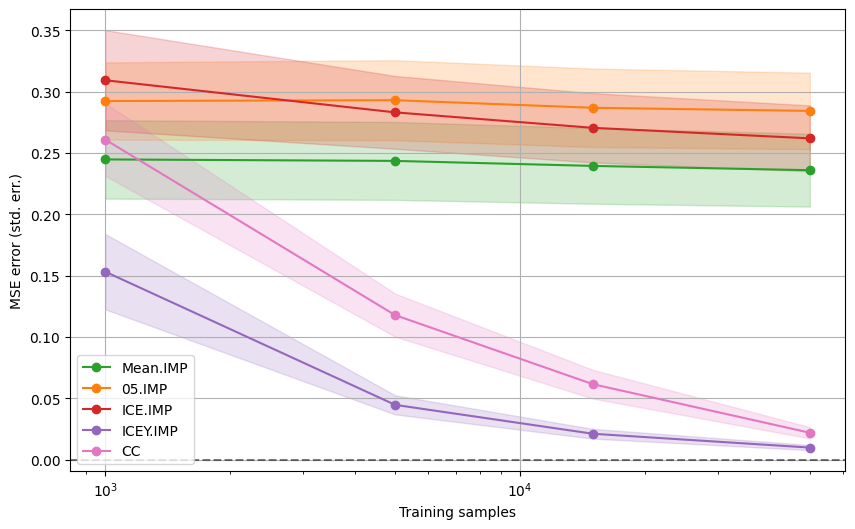

In [ ]:
SCORE = "mse_error"
UNCERTAINTY = "se"

uncertainties = {
    "sd": np.std,
    "se": lambda x: np.std(x) / np.sqrt(len(x)),
}


score_label = {
    "angular_error": "Angular error",
    "mse_error": "MSE error",
}

uncertainties_label = {
    "sd": "std. dev.",
    "se": "std. err.",
}


color_palette = plt.cm.tab10.colors

methods_config = {
    "LOG.0": {"label": "0.IMP", "color": color_palette[0], "linestyle": "-", "marker": "o"},
    "LOG.05": {"label": "05.IMP", "color": color_palette[1], "linestyle": "-", "marker": "o"},
    "LOG.05.M": {"label": "05.IMP.M", "color": color_palette[1], "linestyle": ":", "marker": "x"},
    "LOG.Mean": {"label": "Mean.IMP", "color": color_palette[2], "linestyle": "-", "marker": "o"},
    "LOG.Mean.M": {"label": "Mean.IMP.M", "color": color_palette[2], "linestyle": ":", "marker": "x"},
    "LOG.ICE": {"label": "ICE.IMP", "color": color_palette[3], "linestyle": "-", "marker": "o"},
    "LOG.ICE.M": {"label": "ICE.IMP.M", "color": color_palette[3], "linestyle": ":", "marker": "x"},
    "LOG.ICEY": {"label": "ICEY.IMP", "color": color_palette[4], "linestyle": "-", "marker": "o"},
    "LOG.ICEY.M": {"label": "ICEY.IMP.M", "color": color_palette[4], "linestyle": ":", "marker": "x"},
    "LOG.PbP": {"label": "PbP", "color": color_palette[5], "linestyle": "-", "marker": "o"},
    "CC": {"label": "CC", "color": color_palette[6], "linestyle": "-", "marker": "o"},
}


df_all_beta_scores = pd.read_csv('data_log\df_scores_beta.csv')
print(df_all_beta_scores.shape)

n_trains = np.unique(df_all_beta_scores["n_train"])
df_scores = df_all_beta_scores.groupby(["method", "n_train"]).agg({
    SCORE: ["mean", uncertainties[UNCERTAINTY], len],
}).reset_index()

df_scores = df_scores[df_scores["method"] != "LOG.PbP"]

# plot scores
fig, ax = plt.subplots(figsize=(10, 6))

df_scores.columns = ["method", "n_train", "mean", "uncertainty", "n"]


list_methods = ["LOG.Mean", "LOG.05", "LOG.ICE", "LOG.ICEY", "CC"]
print(list_methods)
for i, met in enumerate(list_methods):

    df_met = df_scores[df_scores["method"] == met]
    plt.plot(
        df_met["n_train"],
        df_met["mean"],
        label=methods_config[met]["label"],
        marker=methods_config[met]["marker"],
        linestyle=methods_config[met]["linestyle"],
        color=methods_config[met]["color"],
    )
    plt.fill_between(
        df_met["n_train"],
        df_met["mean"] - df_met["uncertainty"],
        df_met["mean"] + df_met["uncertainty"],
        alpha=0.2,
        color=methods_config[met]["color"],
    )

# hline at 0

plt.axhline(0, color="black", linestyle="--", alpha=0.5)
plt.grid()
plt.legend()

plt.xlabel("Training samples")
plt.ylabel(f"{score_label[SCORE]} ({uncertainties_label[UNCERTAINTY]})")

# x log scale
plt.xscale("log")

# plt.savefig("save_plots/MSE_ALL.pdf")

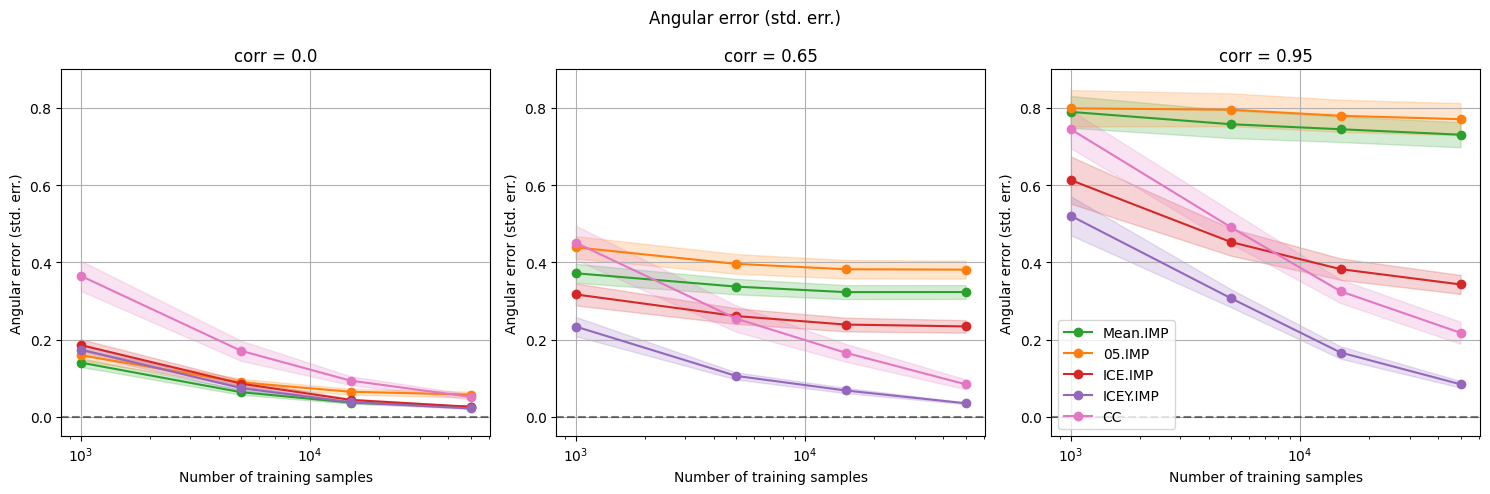

In [7]:
plot_beta_scores(
    variable_name="corr",
    score="angular_error",
    uncertainty="se",
    
    log_x=True,
    log_y=False,
    max_n_cols=3,
    min_y=-0.05,
    max_y=0.9,

    #

    # save_pdf="save_plots/Angular_CORR.pdf",

    #

    # bias=0.,


)